# Classification

### Importing the Necessary Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.classification import setup, create_model, compare_models, predict_model, finalize_model, save_model, plot_model

mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [95]:
df = pd.read_csv("Titanic.csv")

print(df.head())

   Caso Survived   Age Passenger     Sex  Hermanos o Esposas  Niños  Tarifa
0     1      Yes  29.0     First  Female                   0      0   211.3
1     2       No   2.0     First  Female                   1      2   151.6
2     3       No  30.0     First    Male                   1      2   151.6
3     4       No  25.0     First  Female                   1      2   151.6
4     5      Yes  48.0     First    Male                   0      0    26.6


In [96]:
df = df.drop(columns=["Caso"])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            916 non-null    object 
 1   Age                 916 non-null    float64
 2   Passenger           916 non-null    object 
 3   Sex                 916 non-null    object 
 4   Hermanos o Esposas  916 non-null    int64  
 5   Niños               916 non-null    int64  
 6   Tarifa              916 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 50.2+ KB


In [98]:
df_encoded = pd.get_dummies(df, columns=['Passenger', 'Sex'], drop_first=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            916 non-null    object 
 1   Age                 916 non-null    float64
 2   Passenger           916 non-null    object 
 3   Sex                 916 non-null    object 
 4   Hermanos o Esposas  916 non-null    int64  
 5   Niños               916 non-null    int64  
 6   Tarifa              916 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 50.2+ KB


### Exploratory Data Analysis

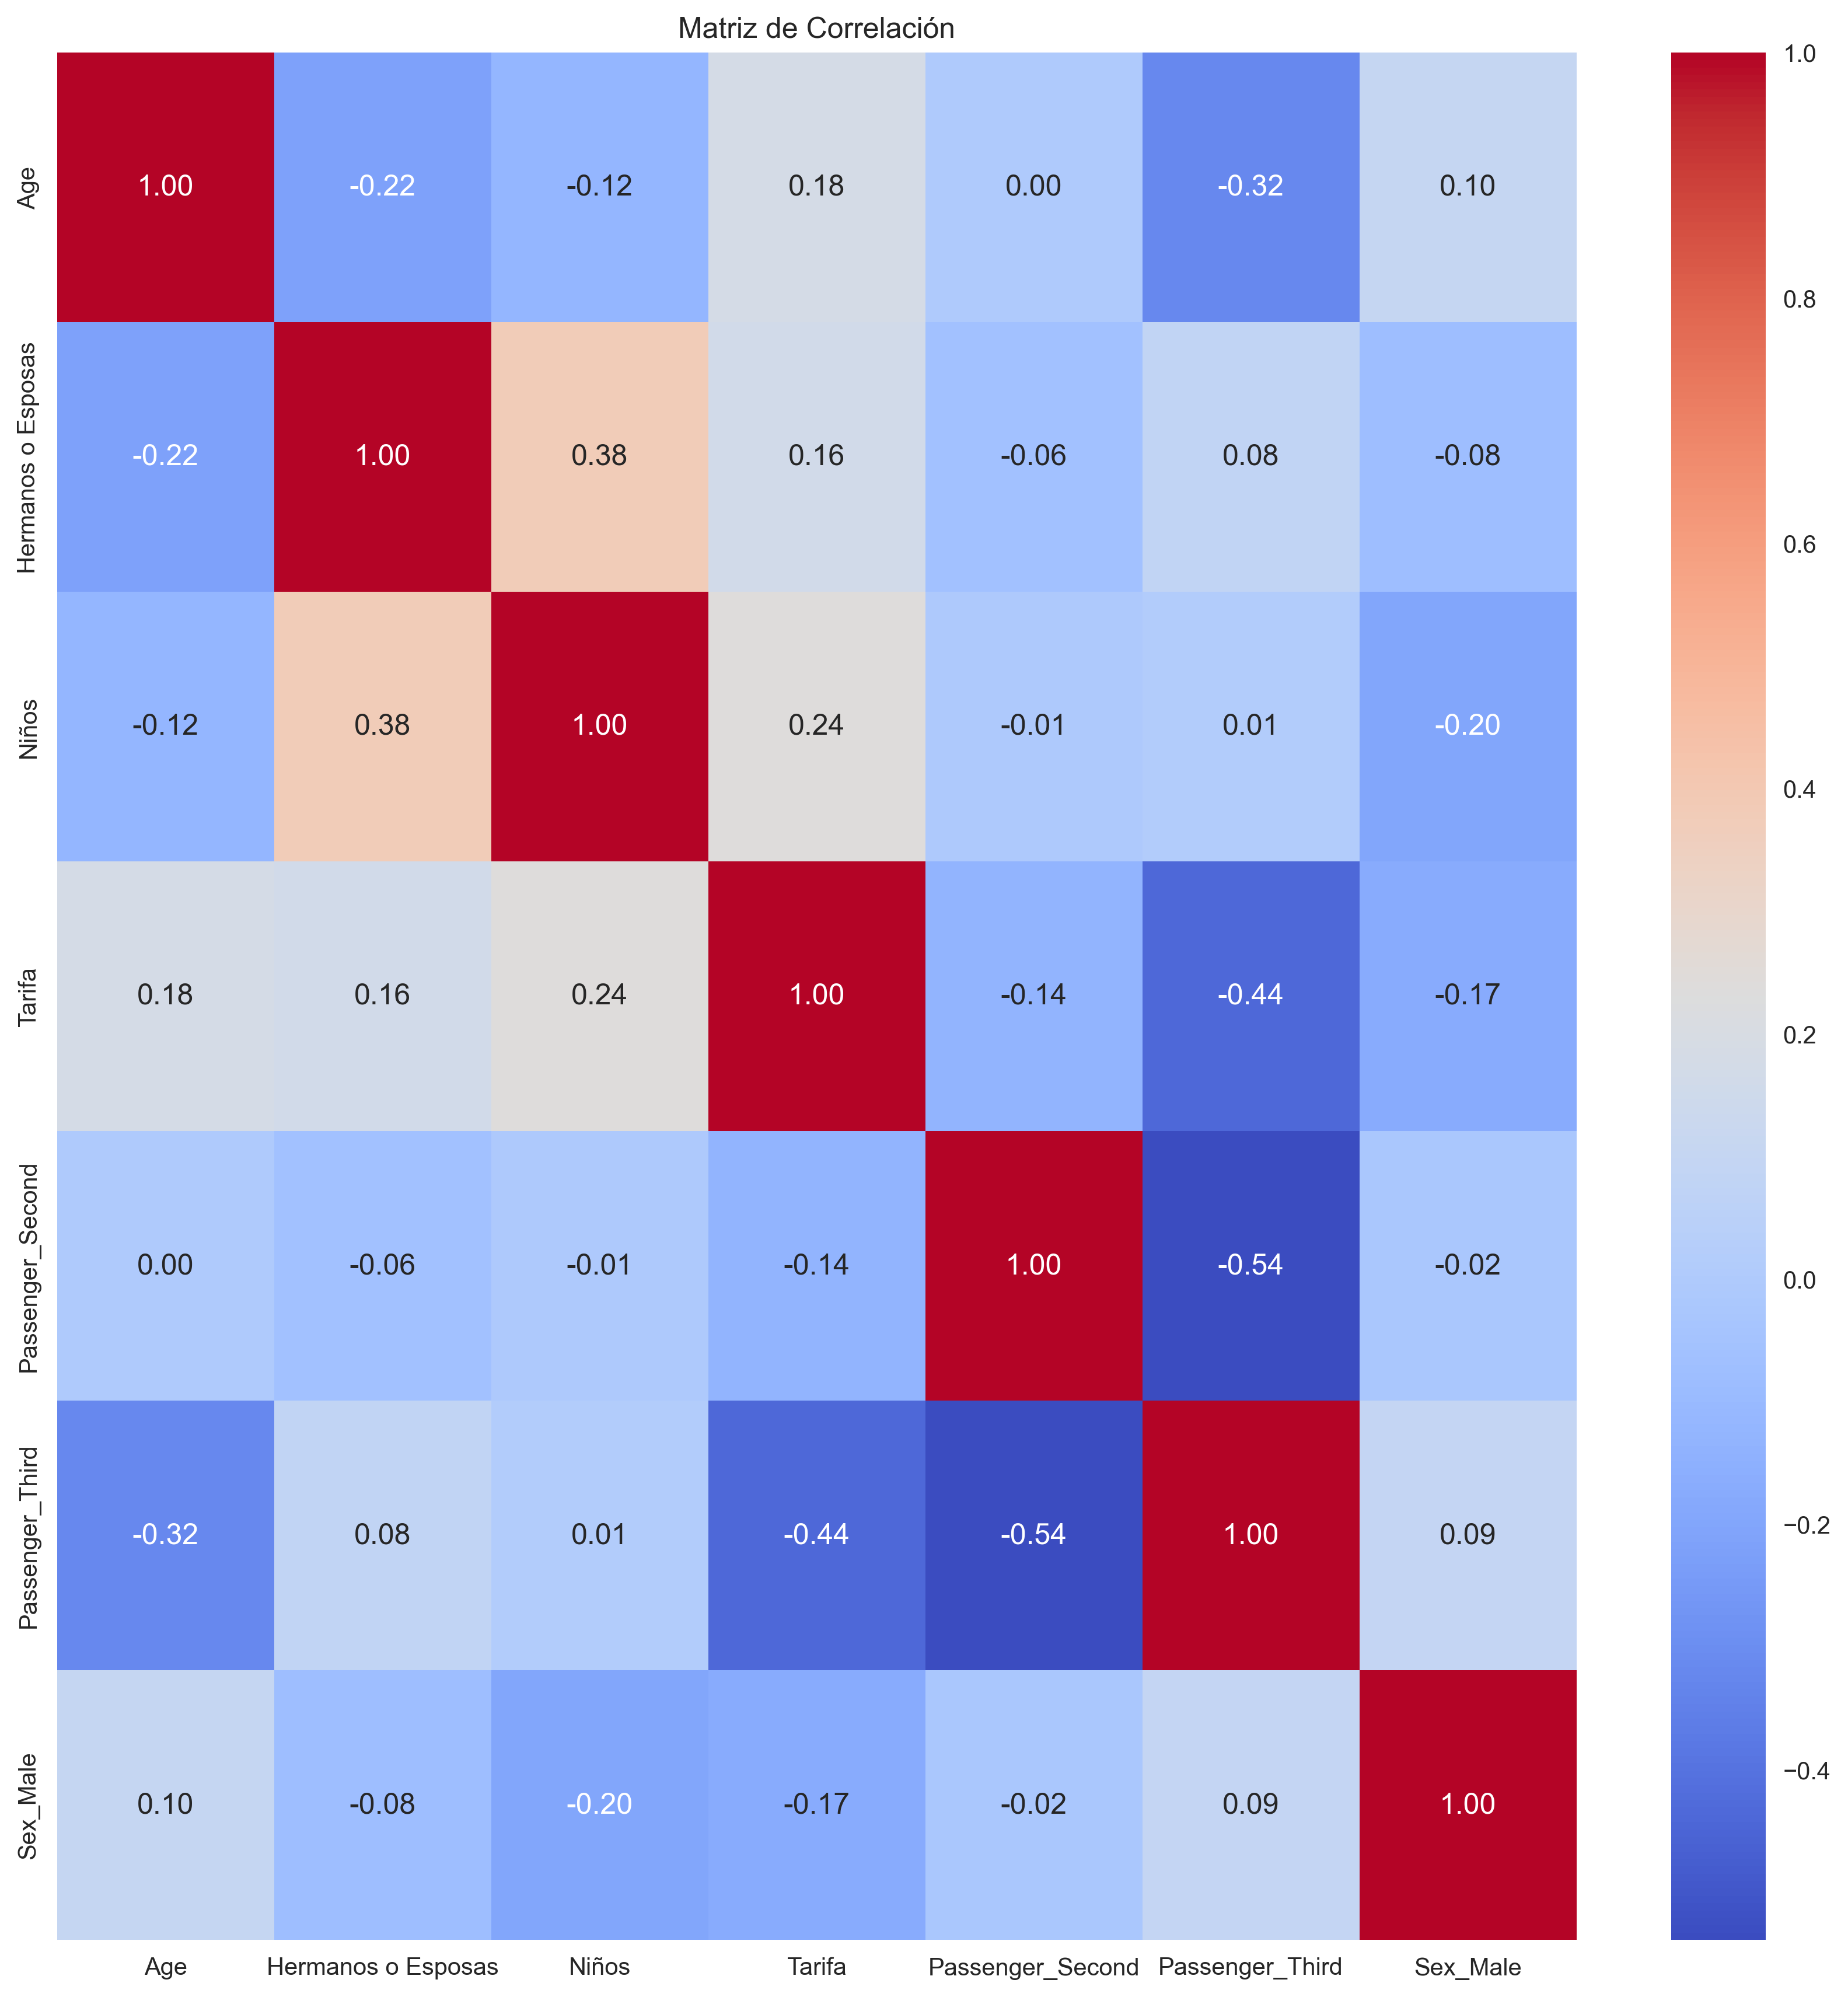

In [100]:
columns_to_include = [
     'Age', 'Hermanos o Esposas', 'Niños', 'Tarifa'] + [col for col in df_encoded.columns if col.startswith('Passenger') or col.startswith('Sex')]

corr_matrix = df_encoded[columns_to_include].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


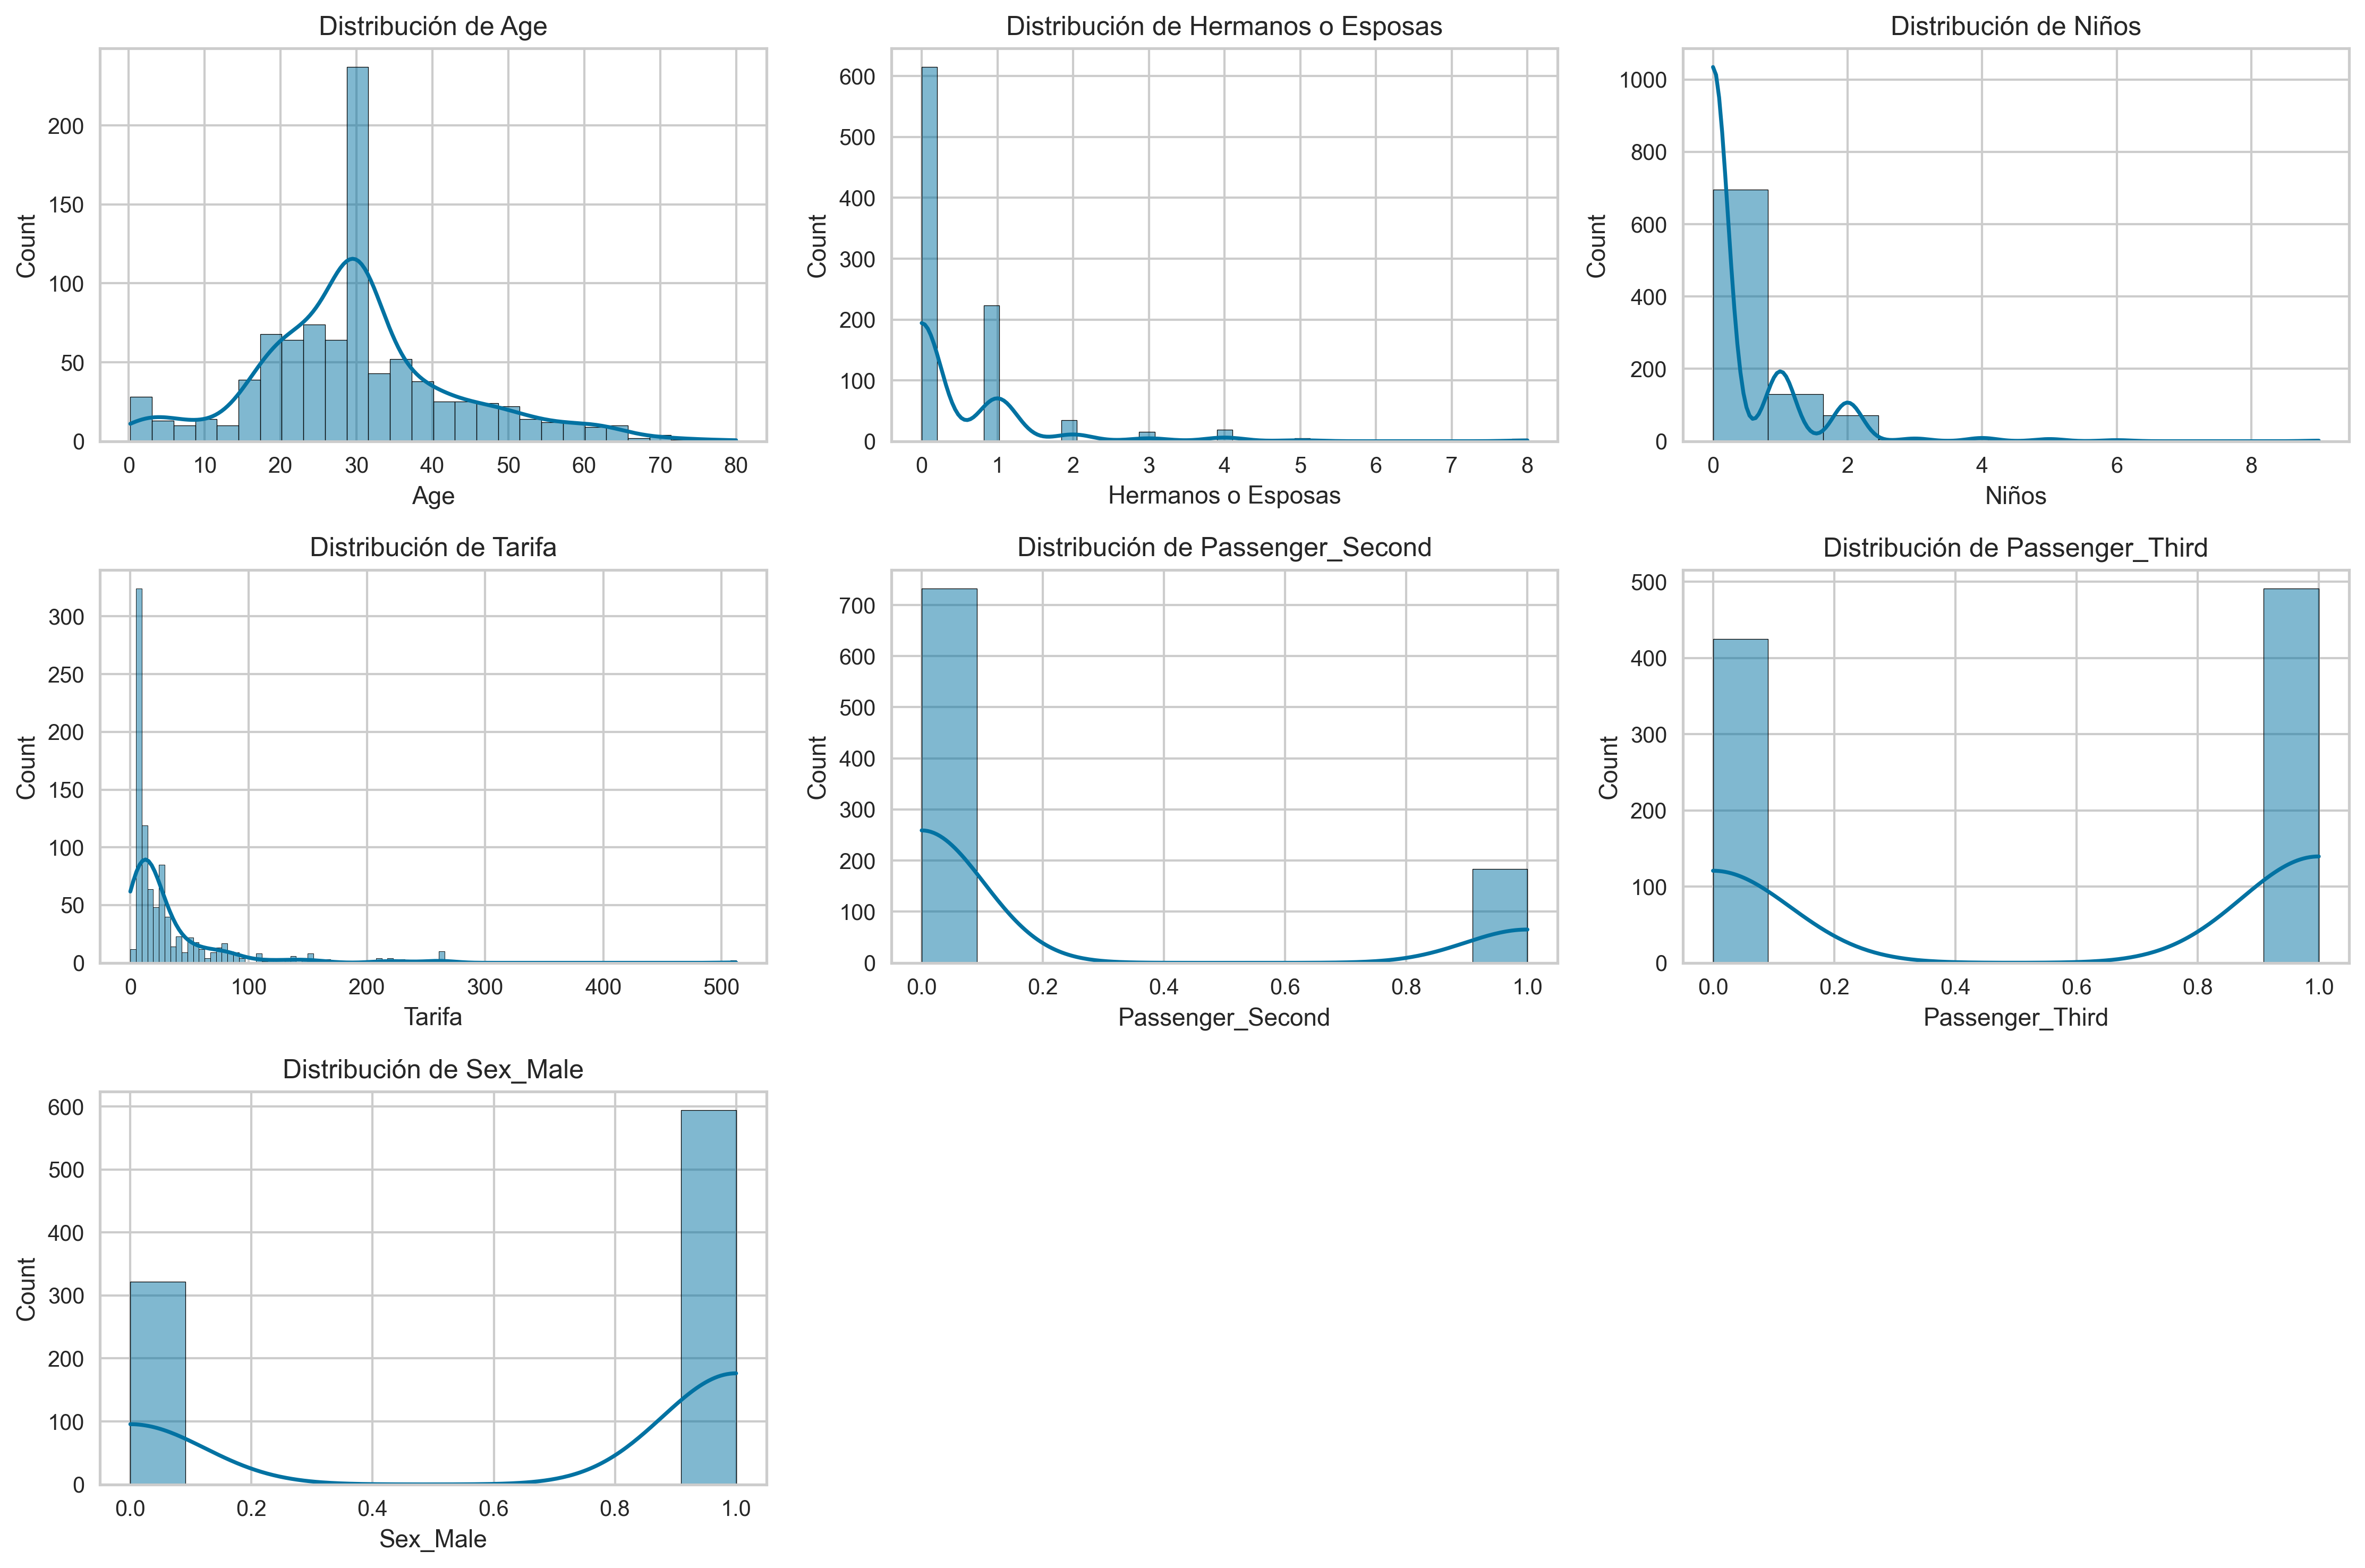

In [101]:


plt.figure(figsize=(15, 10))


features = ['Age', 'Hermanos o Esposas', 'Niños', 'Tarifa'] + [col for col in df_encoded.columns if col.startswith('Passenger')or col.startswith('Sex')]


for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df_encoded[feature], kde=True)  
    plt.title(f'Distribución de {feature}')


plt.tight_layout()
plt.show()


### Initializing the PyCaret Environment

In [102]:
classf = setup(data=df, target = 'Survived', train_size = 0.8,
               normalize = True, session_id = 3934)

,Description,Value
0,Session id,3934
1,Target,Survived
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(916, 7)"
5,Transformed data shape,"(916, 9)"
6,Transformed train set shape,"(732, 9)"
7,Transformed test set shape,"(184, 9)"
8,Ordinal features,1
9,Numeric features,4


### Comparing Classification Models

In [103]:
compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6202,0.5344,0.6202,0.4670,0.4829,0.0093,0.0221,2.4860
ridge,Ridge Classifier,0.6202,0.0000,0.6202,0.4670,0.4829,0.0093,0.0221,0.0550
lda,Linear Discriminant Analysis,0.6202,0.5333,0.6202,0.4670,0.4829,0.0093,0.0221,0.0670
dummy,Dummy Classifier,0.6188,0.5000,0.6188,0.3830,0.4731,0.0000,0.0000,0.0560
knn,K Neighbors Classifier,0.5859,0.5263,0.5859,0.5653,0.5662,0.0708,0.0743,0.0880
ada,Ada Boost Classifier,0.5779,0.5157,0.5779,0.5087,0.5052,-0.0283,-0.0341,0.1360
gbc,Gradient Boosting Classifier,0.5779,0.5132,0.5779,0.5205,0.5165,-0.0123,-0.0138,0.0950
nb,Naive Bayes,0.5684,0.5177,0.5684,0.5293,0.5094,-0.0077,-0.0035,0.0590
lightgbm,Light Gradient Boosting Machine,0.5601,0.5198,0.5601,0.5385,0.5413,0.0198,0.0207,0.3020
rf,Random Forest Classifier,0.5518,0.5038,0.5518,0.5320,0.5354,0.0065,0.0071,0.2720


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3934, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Creating the Model

In [104]:
model = create_model('lda')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:42:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6216,0.4922,0.6216,0.5777,0.4993,0.0171,0.0418
1,0.6216,0.6141,0.6216,0.3864,0.4766,0.0000,0.0000
2,0.6164,0.5652,0.6164,0.3938,0.4806,-0.0271,-0.0903
3,0.6164,0.4706,0.6164,0.3800,0.4702,0.0000,0.0000
4,0.6301,0.4004,0.6301,0.6432,0.5212,0.0592,0.1205
5,0.6164,0.5786,0.6164,0.3800,0.4702,0.0000,0.0000
6,0.6301,0.6837,0.6301,0.7688,0.5006,0.0437,0.1494
7,0.6164,0.4746,0.6164,0.3800,0.4702,0.0000,0.0000
8,0.6164,0.4357,0.6164,0.3800,0.4702,0.0000,0.0000


### Making Predictions

In [105]:
predictions = predict_model(model)

predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6359,0.4805,0.6359,0.6955,0.5185,0.0589,0.1444


,Age,Passenger,Sex,Hermanos o Esposas,Niños,Tarifa,Survived,prediction_label,prediction_score
219,30.0,First,Female,0,0,79.199997,Yes,No,0.7122
105,71.0,First,Male,0,0,34.700001,No,No,0.6252
438,35.0,Third,Male,0,0,8.100000,No,No,0.6436
766,28.0,Third,Male,0,0,22.500000,No,No,0.6698
722,21.0,Third,Male,0,0,7.800000,Yes,No,0.7219
617,30.0,Third,Male,0,0,7.200000,No,No,0.6719
6,39.0,First,Male,0,0,0.000000,No,No,0.6125
397,23.0,Second,Male,0,0,15.000000,No,No,0.6677
527,17.0,Third,Male,2,0,8.100000,No,No,0.6536
475,32.0,Third,Male,0,0,56.500000,Yes,No,0.6348


### Plotting the Model

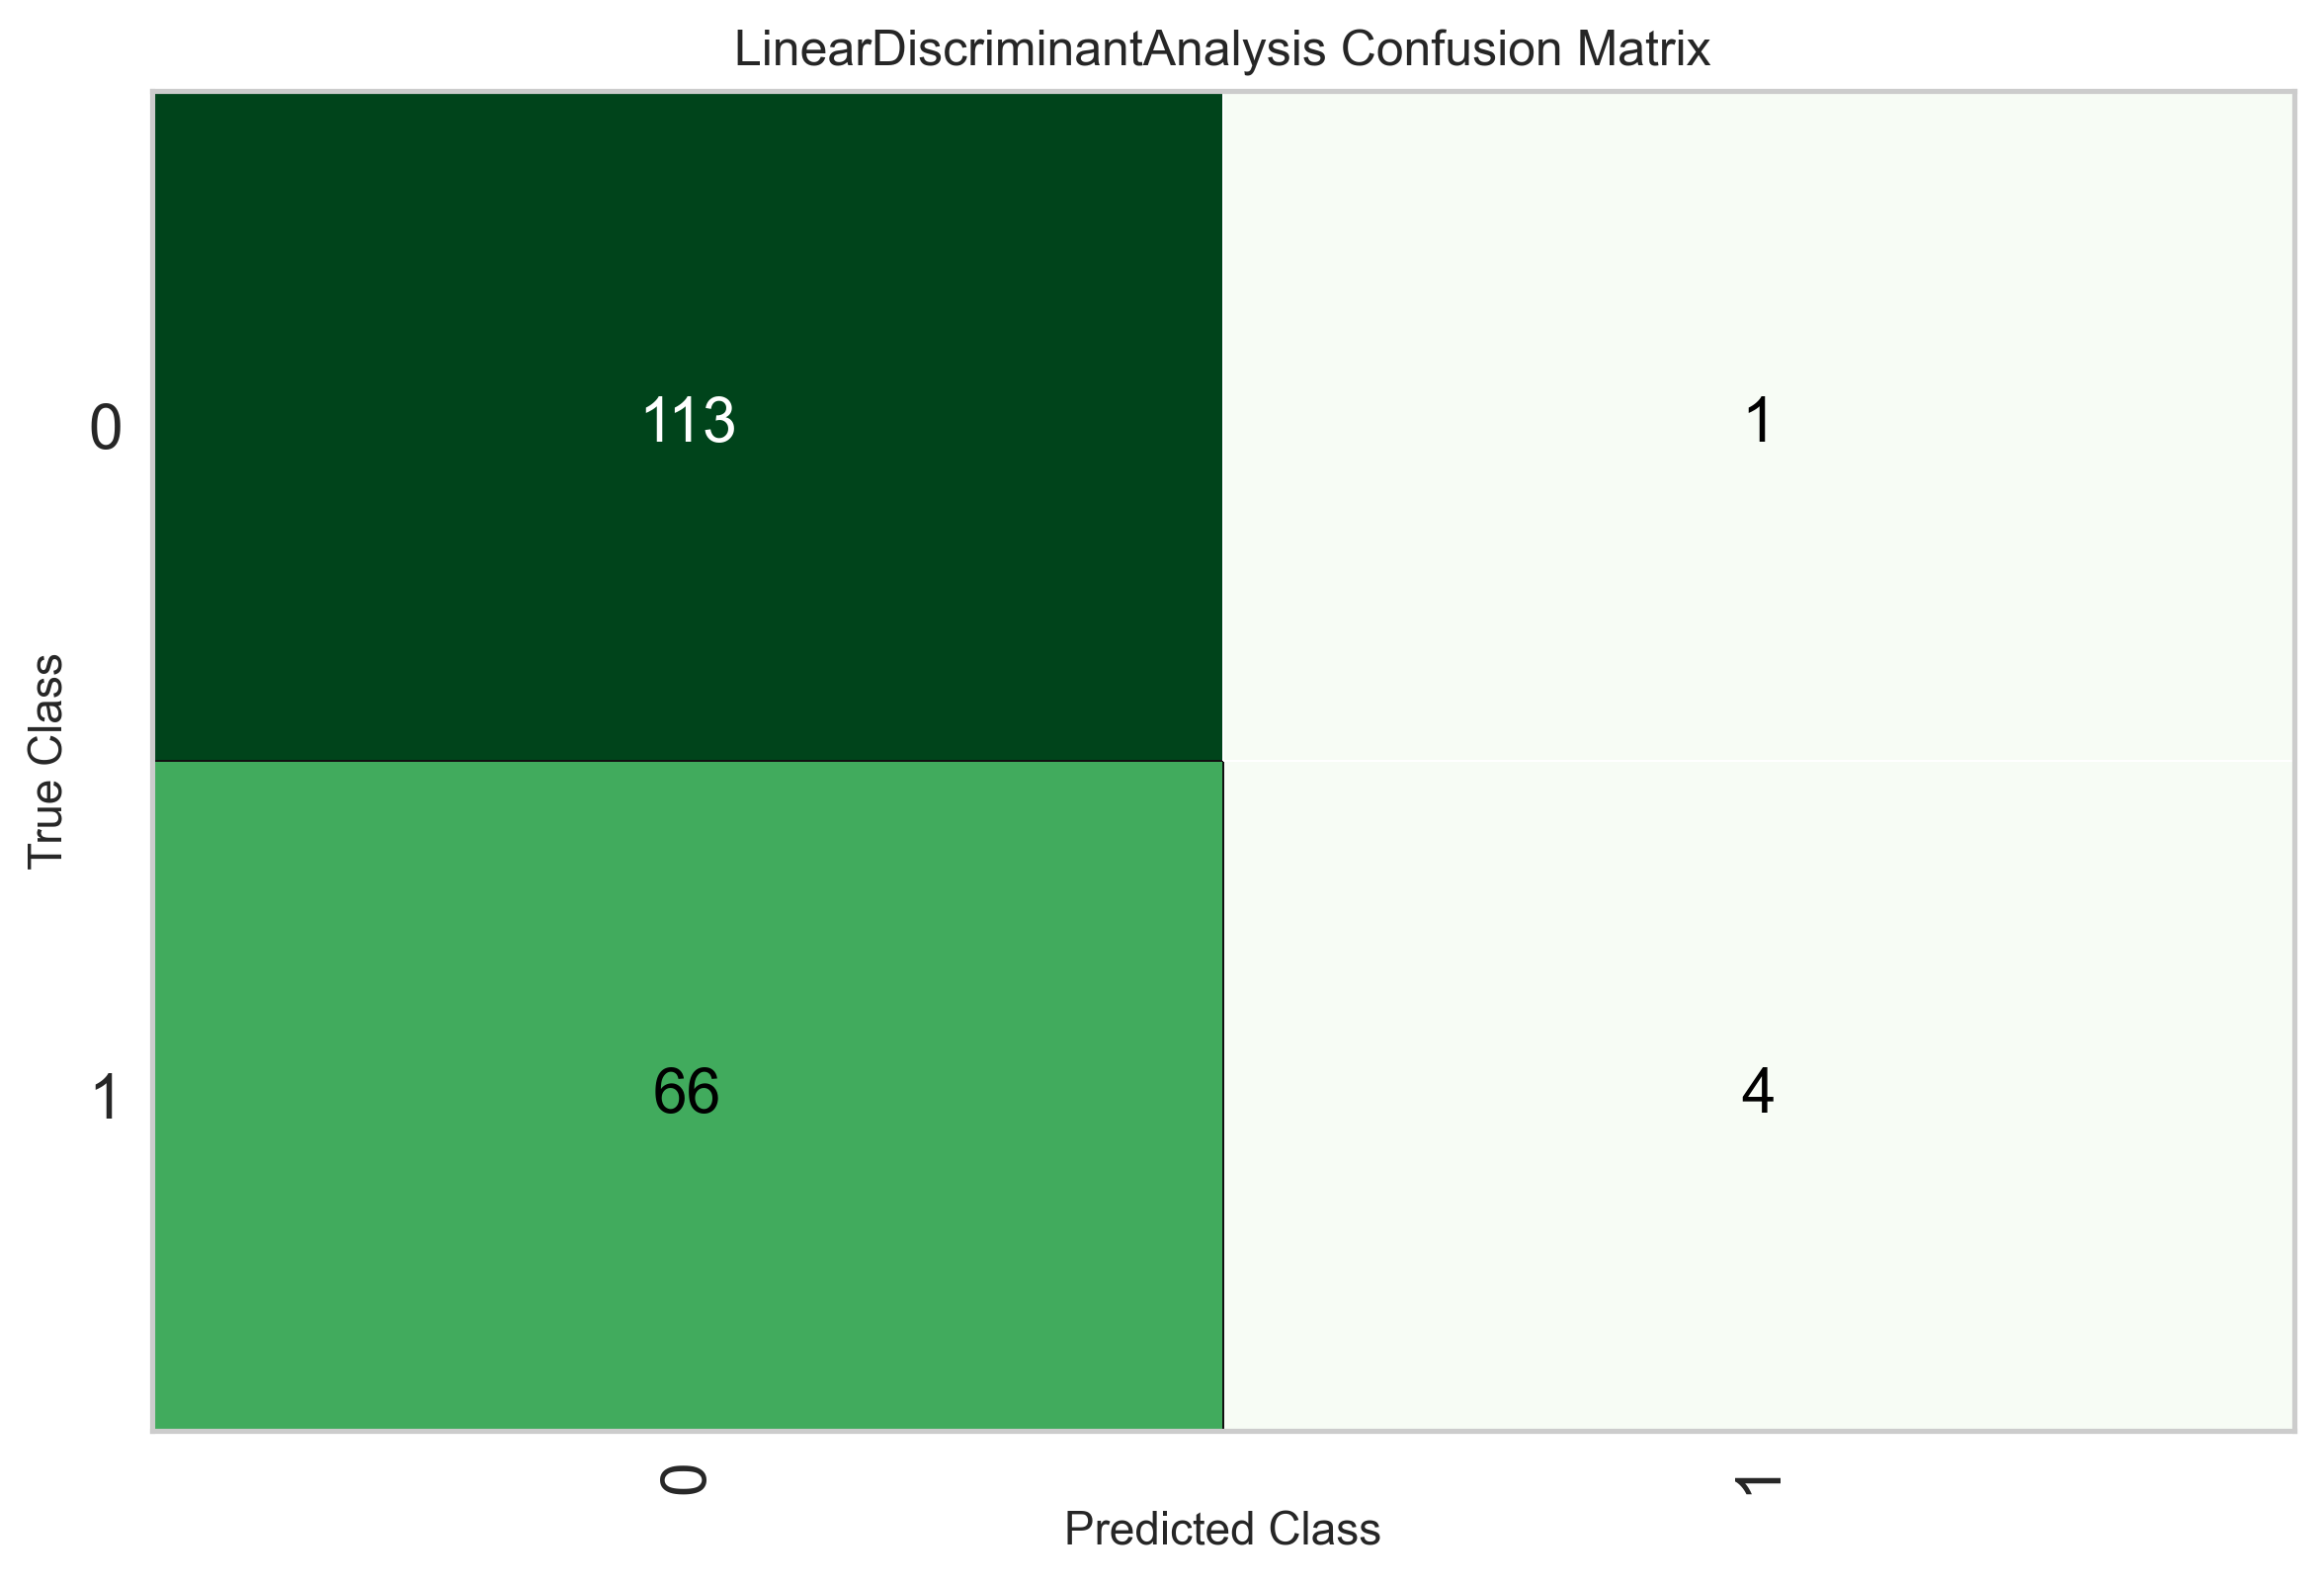

In [107]:
plot_model(model, 'confusion_matrix')

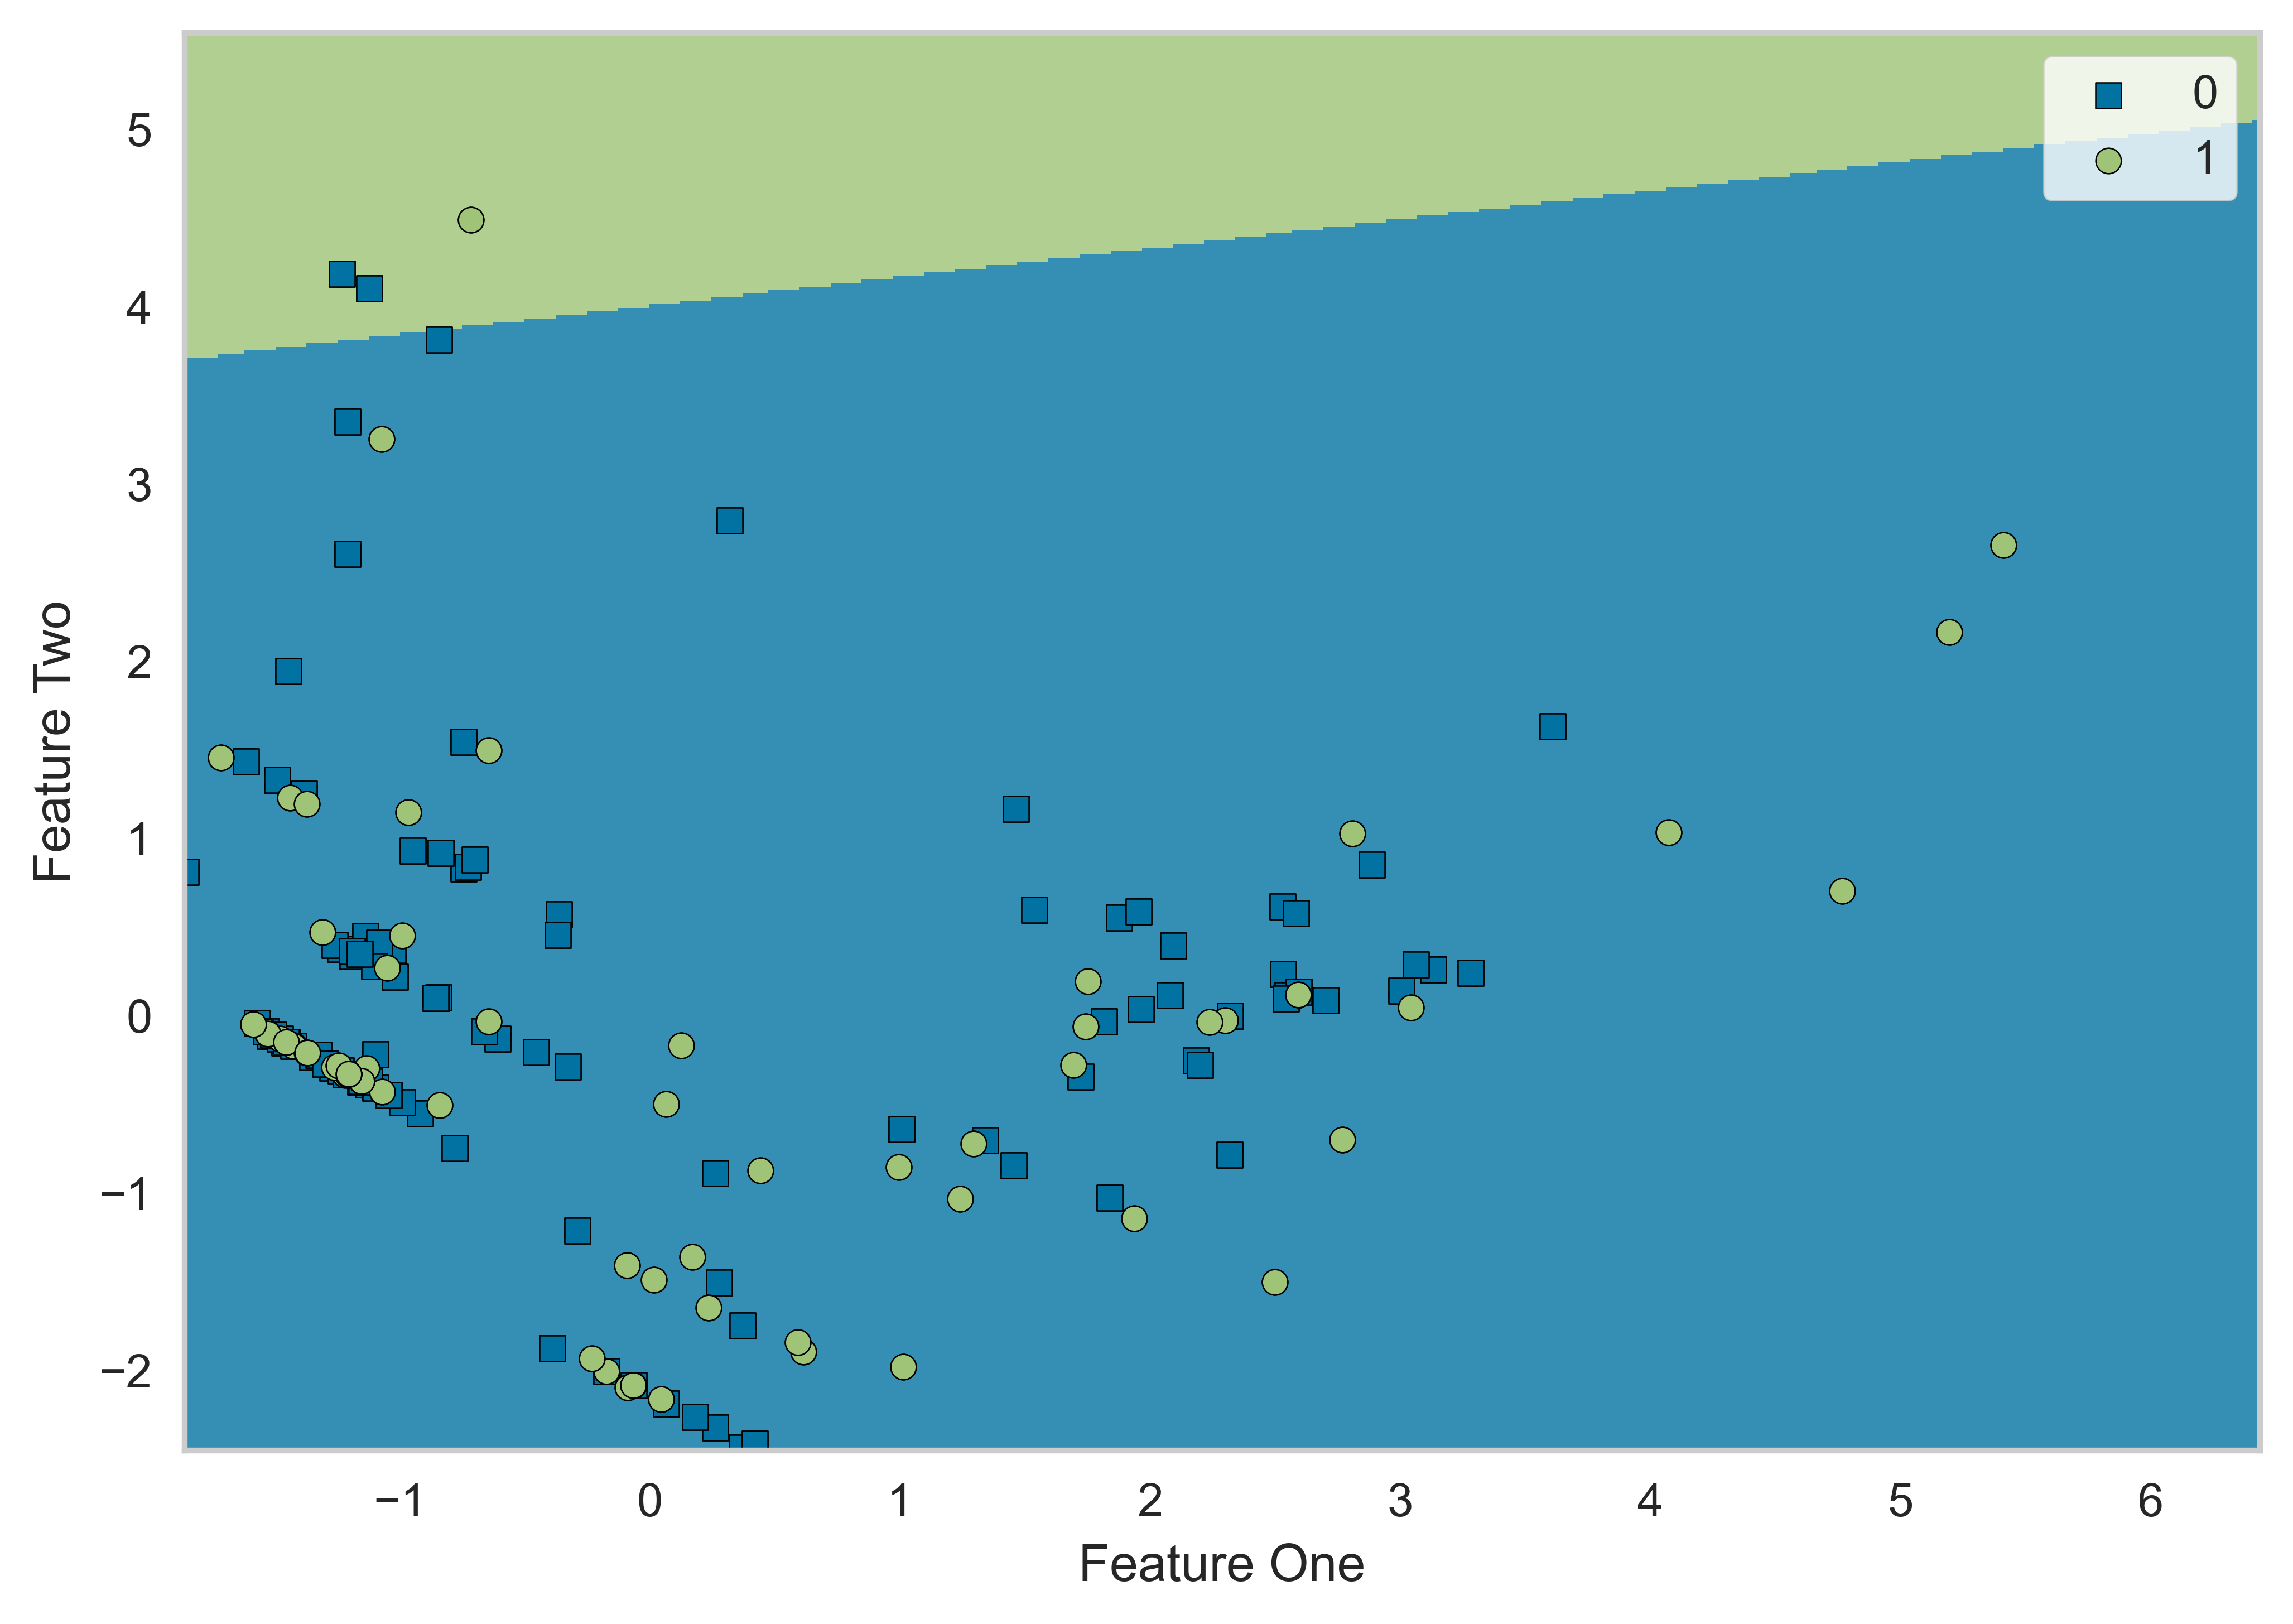

In [108]:
plot_model(model, 'boundary', scale = 2)

### Finalizing and Saving the Model

In [109]:
final_model = finalize_model(model)

save_model(final_model, 'titanic_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Hermanos o Esposas',
                                              'Niños', 'Tarifa'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False...
                                     transformer=StandardScaler(copy=True,
                                                                with_mean=True,
                                                      